In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

## Линейная регрессия

In [5]:
df = fetch_california_housing()
features = pd.DataFrame(df.data)
target = pd.DataFrame(df.target)

Мучать линейную модель буду на заготовленном наборе данных 

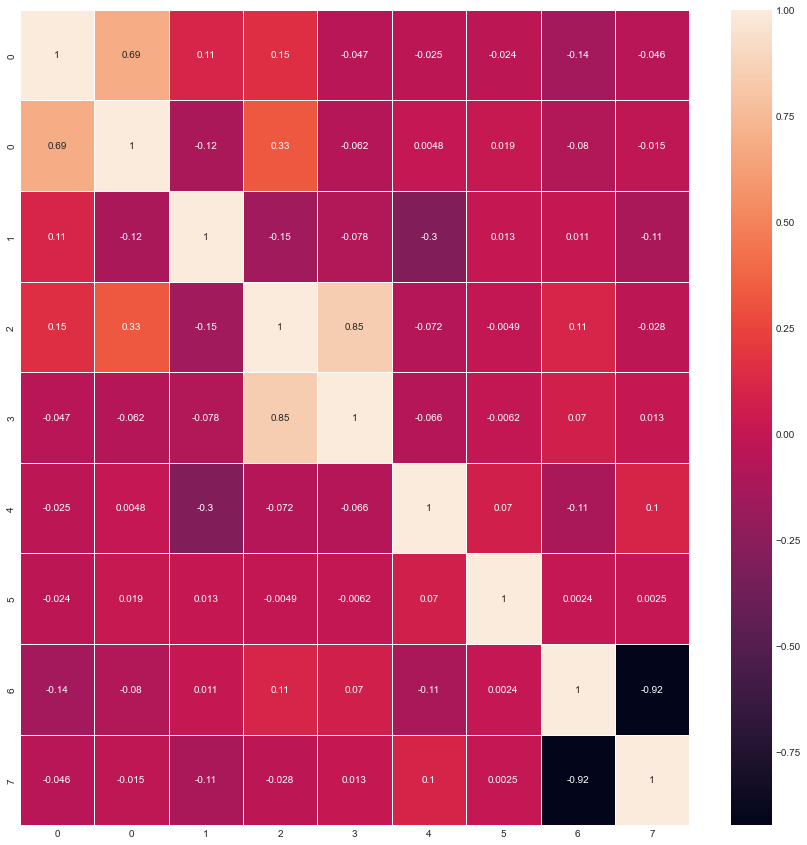

In [14]:
fig = plt.figure(figsize = (15,15))
ax = sns.heatmap(pd.concat([target, features], axis = 1).corr(), linewidths=.5, annot = True)
plt.show();

На графике видно, что таргет сильно коррелирует с 0ым графиком

In [15]:
pd.concat([target, features], axis = 1).describe()

,0,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [16]:
pd.concat([target, features], axis = 1).isna().sum()

0    0
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [17]:
pd.concat([target, features], axis = 1).duplicated().sum()

0

## Обучение модели 

In [18]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

In [19]:
for i in [features_train, features_test, target_train, target_test]:
    print(i.shape)

(14448, 8)
(6192, 8)
(14448, 1)
(6192, 1)


In [20]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [21]:
model.intercept_  #смещение

array([-36.27064507])

In [22]:
model.coef_ #весовые коэффициенты

array([[ 4.32554559e-01,  9.59236749e-03, -9.84856265e-02,
         6.00297448e-01, -3.07025576e-06, -3.83968854e-03,
        -4.13212870e-01, -4.26567527e-01]])

In [32]:
predict = model.predict(features_test)

In [34]:
mean_squared_error(predict, target_test)

0.520817417351351